In [5]:
import torch
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               37376     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9000


C:\Users\user\AppData\Local\Temp\ipykernel_17012\3375157970.py:10: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


1/1 [==============================] - 1s 630ms/step - loss: 530.0704 - mean_absolute_error: 22.6125 - val_loss: 526.4460 - val_mean_absolute_error: 22.5366
Epoch 2/9000
1/1 [==============================] - 0s 66ms/step - loss: 520.7469 - mean_absolute_error: 22.3986 - val_loss: 516.2778 - val_mean_absolute_error: 22.3020
Epoch 3/9000
1/1 [==============================] - 0s 31ms/step - loss: 511.1713 - mean_absolute_error: 22.1753 - val_loss: 505.3289 - val_mean_absolute_error: 22.0447
Epoch 4/9000
1/1 [==============================] - 0s 63ms/step - loss: 500.8095 - mean_absolute_error: 21.9298 - val_loss: 493.6449 - val_mean_absolute_error: 21.7651
Epoch 5/9000
1/1 [==============================] - 0s 31ms/step - loss: 489.5396 - mean_absolute_error: 21.6586 - val_loss: 481.1473 - val_mean_absolute_error: 21.4610
Epoch 6/9000
1/1 [==============================] - 0s 32ms/step - loss: 477.4588 - mean_absolute_error: 21.3635 - val_loss: 467.9018 - val_mean_absolute_error: 21.133

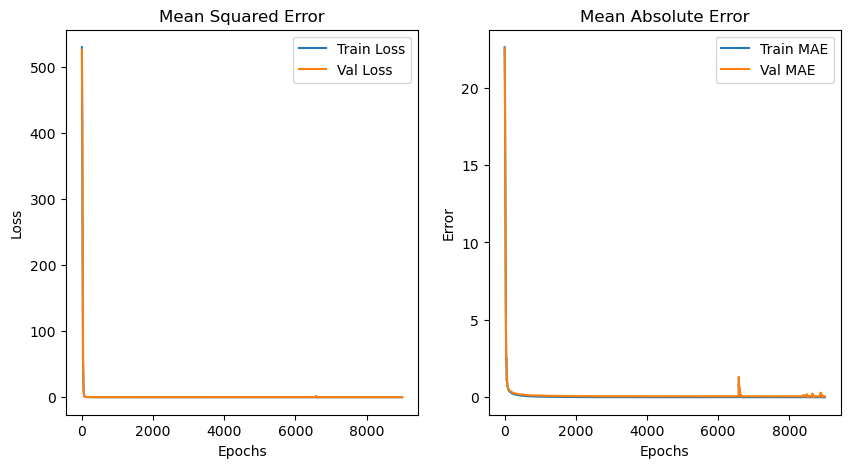

41/41 [==============================] - 0s 1ms/step - loss: 0.1571 - mean_absolute_error: 0.0650
Test Loss: 0.15709640085697174
Test MAE: 0.06498195976018906
33/33 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_absolute_error: 0.0573
Validation Loss: 0.051064033061265945
Validation MAE: 0.057300370186567307
33/33 [==============================] - 0s 1ms/step
R2 Score: 0.9971216320991516


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values  # 예측값

# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train 데이터셋의 일부를 다시 train(sub)/val 데이터셋으로 나누기 (80% sub(train), 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# 스케일링
scaler = StandardScaler()
X_sub = scaler.fit_transform(X_sub)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Sequential 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),  # 입력계층 특성 수를 자동으로 설정
    tf.keras.layers.Dense(64, activation='relu'),  # 은닉계층1
    tf.keras.layers.Dense(32, activation='relu'),  # 은닉계층2
    tf.keras.layers.Dense(16, activation='relu'),  # 은닉계층3
    tf.keras.layers.Dense(1, activation='linear')  # 출력계층 activation linear 사용
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

# 모델 학습
history = model.fit(X_sub, y_sub, validation_data=(X_val, y_val), epochs=9000, batch_size=100000) # 수정

# 학습 결과 시각화
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

# 모델 평가 - 테스트 데이터셋 사용
loss_test, mae_test = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_test}')
print(f'Test MAE: {mae_test}')

# 모델 평가 - 검증 데이터셋 사용
loss_val, mae_val = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss_val}')
print(f'Validation MAE: {mae_val}')

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 계산
r2 = r2_score(y_val, predictions)
print(f'R2 Score: {r2}')